In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

f = xr.open_dataset("/lustre/ytzheng/Data/CTRC_Yannian/All_2014_NCEP_1stprcesd.nc")

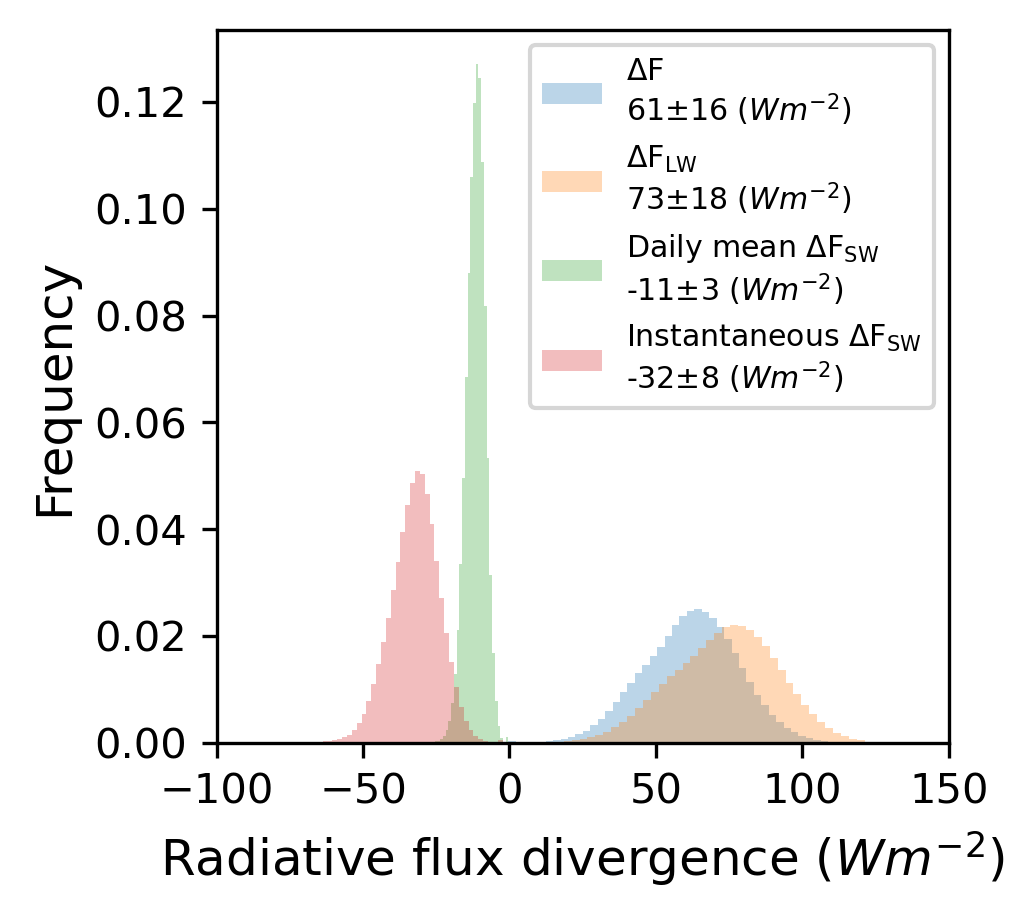

In [4]:
myfontsize = 12

fig, ax = plt.subplots(ncols = 1,
                        nrows = 1,
                        figsize=(8/2.54, (8)/2.54), dpi = 300)

var = -(f.sel(var_names = 'LW_cool').arrvar + f.sel(var_names = 'SW_heat_dmean').arrvar)
ax.hist(var, 80, density=True, alpha=0.3, label = r"$\mathrm{\Delta F}$" + '\n' +
        '%d' % np.mean(var) + r'$\pm$' + '%d' % np.std(var) + ' ($W m^{-2}$)')

var = -f.sel(var_names = 'LW_cool').arrvar
ax.hist(var, 80, density=True, alpha=0.3, 
        label = r"$\mathrm{\Delta F_{LW}}$" + '\n' +
        '%d' % np.mean(var) + r'$\pm$' + '%d' % np.std(var) + ' ($W m^{-2}$)')

var = -f.sel(var_names = 'SW_heat_dmean').arrvar
ax.hist(var, 80, density=True, alpha=0.3, 
        label = r"Daily mean $\mathrm{\Delta F_{SW}}$"+ '\n'+
        '%d' % np.mean(var) + r'$\pm$' + '%d' % np.std(var) + ' ($W m^{-2}$)')

var = -f.sel(var_names = 'SW_heat').arrvar
ax.hist(var, 80, density=True, alpha=0.3, 
        label = r"Instantaneous $\mathrm{ \Delta F_{SW}}$"+ '\n'+
        '%d' % np.mean(var) + r'$\pm$' + '%d' % np.std(var) + ' ($W m^{-2}$)')

ax.set_xlim(-100, 150)
ax.set_xlabel('Radiative flux divergence ($W m^{-2}$)', size = myfontsize)
ax.set_ylabel('Frequency', size = myfontsize)
    
ax.legend(fontsize = 0.6*myfontsize, loc = 'upper right', frameon = True)

fig.savefig('FigS1_histogram.png', dpi=fig.dpi, bbox_inches='tight')